In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tensorflow-speech-recognition-challenge/link_to_gcp_credits_form.txt
/kaggle/input/tensorflow-speech-recognition-challenge/test.7z
/kaggle/input/tensorflow-speech-recognition-challenge/sample_submission.7z
/kaggle/input/tensorflow-speech-recognition-challenge/train.7z


In [2]:
!pip install pyunpack
!pip install patool

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 1.9 MB/s eta 0:00:00


In [3]:
import os
from pyunpack import Archive
import shutil
if not os.path.exists('/kaggle/working/train/'):
    os.makedirs('/kaggle/working/train/')
Archive('/kaggle/input/tensorflow-speech-recognition-challenge/train.7z').extractall('/kaggle/working/train/')
for dirname, _, filenames in os.walk('/kaggle/working/train/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/working/train/train/LICENSE
/kaggle/working/train/train/README.md
/kaggle/working/train/train/validation_list.txt
/kaggle/working/train/train/testing_list.txt
/kaggle/working/train/train/audio/six/cd3331a6_nohash_0.wav
/kaggle/working/train/train/audio/six/626e323f_nohash_0.wav
/kaggle/working/train/train/audio/six/2167c2ed_nohash_1.wav
/kaggle/working/train/train/audio/six/f1b35ace_nohash_0.wav
/kaggle/working/train/train/audio/six/d91a159e_nohash_0.wav
/kaggle/working/train/train/audio/six/e53139ad_nohash_1.wav
/kaggle/working/train/train/audio/six/9886d8bf_nohash_1.wav
/kaggle/working/train/train/audio/six/c1d39ce8_nohash_2.wav
/kaggle/working/train/train/audio/six/df6bd83f_nohash_0.wav
/kaggle/working/train/train/audio/six/8f4c551f_nohash_0.wav
/kaggle/working/train/train/audio/six/eb0676ec_nohash_2.wav
/kaggle/working/train/train/audio/six/9db2bfe9_nohash_4.wav
/kaggle/working/train/train/audio/six/c634a189_nohash_4.wav
/kaggle/working/train/train/audio/six/7c1d8533_nohash

In [4]:
words=os.listdir('/kaggle/working/train/train/audio')
words

['six',
 'bird',
 'right',
 'one',
 'wow',
 'no',
 'on',
 'zero',
 'two',
 'happy',
 'sheila',
 'nine',
 'bed',
 'marvin',
 'off',
 'house',
 'up',
 'stop',
 'go',
 'cat',
 '_background_noise_',
 'three',
 'eight',
 'dog',
 'left',
 'four',
 'yes',
 'seven',
 'tree',
 'five',
 'down']

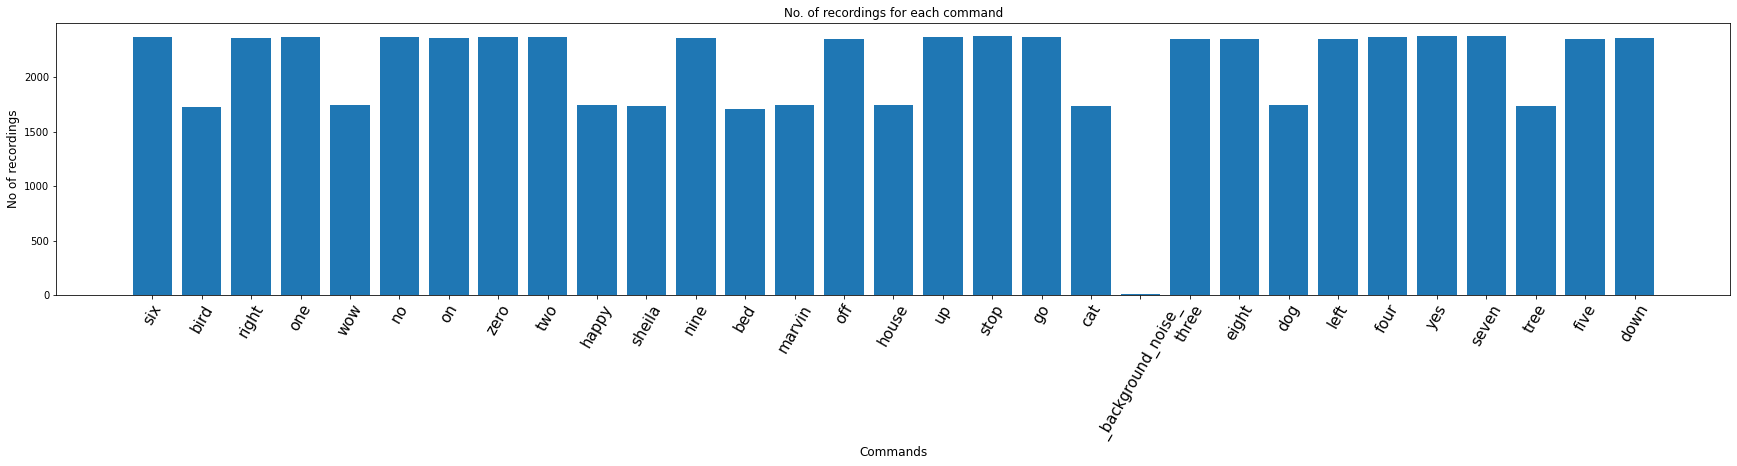

In [5]:
import matplotlib.pyplot as plt
import numpy as np
train_audio_path='/kaggle/working/train/train/audio'
labels=os.listdir(train_audio_path)

#find count of each label and plot bar graph
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

In [6]:
import librosa
all_wave = []
all_label = []

for label in labels[:6]:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 8000)
        #samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

six
bird
right
one
wow
no


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)

In [8]:
from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(labels))

In [9]:
all_wave

[array([-9.9971048e-06, -3.9439292e-05,  1.5541522e-06, ...,
        -1.2894307e-05,  5.3493509e-06,  5.4463228e-05], dtype=float32),
 array([-0.00036435, -0.00039247, -0.00034024, ...,  0.0013266 ,
         0.00151223,  0.00118768], dtype=float32),
 array([-9.1216622e-05, -1.7863694e-04, -2.0450410e-04, ...,
         1.6267033e-05,  1.6180566e-06, -3.1375959e-05], dtype=float32),
 array([ 2.7173938e-04,  4.3344230e-04,  3.8678516e-04, ...,
         9.4014918e-05, -5.5089919e-04, -8.7764853e-04], dtype=float32),
 array([-5.1886214e-05, -9.5377443e-05, -8.4363368e-05, ...,
        -1.3177564e-04, -1.1744109e-04, -1.1395449e-04], dtype=float32),
 array([-0.00280009, -0.00445563, -0.0040738 , ..., -0.0186243 ,
        -0.01642713, -0.0171647 ], dtype=float32),
 array([-0.00213693, -0.00419773, -0.00469959, ..., -0.00588997,
        -0.00554992, -0.00475924], dtype=float32),
 array([-0.00195166, -0.00330942, -0.0023539 , ...,  0.00235639,
         0.00300716,  0.00300202], dtype=float32),


In [10]:
all_wave = np.array(all_wave).reshape(-1,8000)

In [11]:
all_wave.shape

(11601, 8000)

In [12]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)
x_te, x_val, y_te, y_val = train_test_split(x_val,y_val,stratify=y_val,test_size = 0.5,random_state=777,shuffle=True)


In [13]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()

inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.3)(conv)

outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()

2022-12-17 22:01:51.998517: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-17 22:01:51.999564: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-17 22:01:52.274399: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-17 22:01:52.275317: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-17 22:01:52.276083: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8000, 1)]         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 7988, 8)           112       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2662, 8)           0         
_________________________________________________________________
dropout (Dropout)            (None, 2662, 8)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2652, 16)          1424      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 884, 16)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 884, 16)           0     

ead from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-17 22:01:52.527928: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-17 22:01:52.528723: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-17 22:01:52.529475: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-17 22:01:56.872120: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-17

In [14]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 


In [15]:
history=model.fit(x_tr, y_tr ,epochs=100,callbacks=es,  batch_size=32, validation_data=(x_val,y_val))


2022-12-17 22:01:57.729418: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 296960000 exceeds 10% of free system memory.
2022-12-17 22:01:58.111723: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 296960000 exceeds 10% of free system memory.
2022-12-17 22:01:58.379577: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-12-17 22:02:01.037644: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


290/290 [==============================] - 16s 9ms/step - loss: 1.8244 - accuracy: 0.2520 - val_loss: 1.5052 - val_accuracy: 0.3738
Epoch 2/100
290/290 [==============================] - 2s 7ms/step - loss: 1.3934 - accuracy: 0.4445 - val_loss: 1.1921 - val_accuracy: 0.5668
Epoch 3/100
290/290 [==============================] - 2s 7ms/step - loss: 1.0846 - accuracy: 0.5909 - val_loss: 1.0024 - val_accuracy: 0.6167
Epoch 4/100
290/290 [==============================] - 2s 7ms/step - loss: 0.8694 - accuracy: 0.6881 - val_loss: 0.6512 - val_accuracy: 0.7666
Epoch 5/100
290/290 [==============================] - 2s 7ms/step - loss: 0.7279 - accuracy: 0.7412 - val_loss: 0.6286 - val_accuracy: 0.7924
Epoch 6/100
290/290 [==============================] - 2s 7ms/step - loss: 0.6268 - accuracy: 0.7837 - val_loss: 0.6020 - val_accuracy: 0.7821
Epoch 7/100
290/290 [==============================] - 2s 7ms/step - loss: 0.5547 - accuracy: 0.8058 - val_loss: 0.4797 - val_accuracy: 0.8389
Epoch 8/10

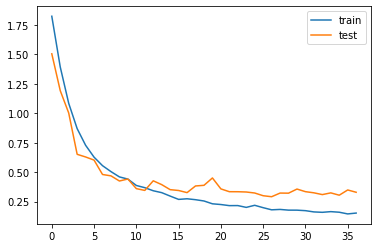

In [16]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend()
pyplot.show()

In [17]:
from keras.models import save
model.save('best_model.hdf5')

In [18]:
def predict(audio):
    prob=model.predict(audio.reshape(1,8000))
    index=np.argmax(prob[0])
    return classes[index]

In [19]:
import random
index=random.randint(0,len(x_val)-1)
samples=x_val[index]
print("Audio:",classes[np.argmax(y_val[index])])
#ipd.Audio(samples, rate=8000)
print("Text:",predict(samples))

Audio: six
Text: six


In [20]:
predictions = model.predict(x=x_te, verbose=0)

In [21]:
print(y_te.shape,predictions.shape)

(1160, 31) (1160, 31)


In [22]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix = confusion_matrix(y_te.argmax(axis=1),predictions.argmax(axis=1))
confusion_matrix
print(classification_report(y_te.argmax(axis=1), predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       152
           1       0.86      0.96      0.90       210
           2       0.92      0.87      0.90       210
           3       0.93      0.86      0.89       215
           4       0.94      0.94      0.94       220
           5       0.90      0.93      0.91       153

    accuracy                           0.91      1160
   macro avg       0.91      0.91      0.91      1160
weighted avg       0.91      0.91      0.91      1160



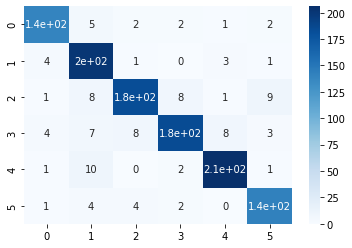

In [23]:
import seaborn as sn

sn.heatmap(confusion_matrix, annot=True, cmap=plt.cm.Blues)
plt.show()